## Some standard experiments

In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

pybamm.set_logging_level("NOTICE")

## CCCV

In [2]:

experiment = pybamm.Experiment([
    ("Discharge at 1C until 2.5V",
    "Rest for 1 hour",
    "Charge at 1C until 4.2V",
    "Hold at 4.2V until C/50"),
])
model = pybamm.lithium_ion.SPMe()
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Chen2020)
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

2021-09-24 15:20:52,453 - [NOTICE] simulation.solve(784): Cycle 1/1 (101.767 ms elapsed) --------------------
2021-09-24 15:20:52,453 - [NOTICE] simulation.solve(818): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2021-09-24 15:20:52,546 - [NOTICE] simulation.solve(818): Cycle 1/1, step 2/4: Rest for 1 hour
2021-09-24 15:20:52,605 - [NOTICE] simulation.solve(818): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-09-24 15:20:52,677 - [NOTICE] simulation.solve(818): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-09-24 15:20:53,112 - [NOTICE] simulation.solve(913): Finish experiment simulation, took 761.725 ms


interactive(children=(FloatSlider(value=0.0, description='t', max=3.911842513594913, step=0.039118425135949125…

In [3]:
experiment = pybamm.Experiment([
    ("Discharge at 1C until 2.5V",
    "Rest for 1 hour",
    "Charge at 1C until 4.2V",
    "Hold at 4.2V until C/50")]*2)
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

2021-09-24 15:20:55,056 - [NOTICE] simulation.solve(784): Cycle 1/2 (24.075 ms elapsed) --------------------
2021-09-24 15:20:55,057 - [NOTICE] simulation.solve(818): Cycle 1/2, step 1/4: Discharge at 1C until 2.5V
2021-09-24 15:20:55,142 - [NOTICE] simulation.solve(818): Cycle 1/2, step 2/4: Rest for 1 hour
2021-09-24 15:20:55,202 - [NOTICE] simulation.solve(818): Cycle 1/2, step 3/4: Charge at 1C until 4.2V
2021-09-24 15:20:55,276 - [NOTICE] simulation.solve(818): Cycle 1/2, step 4/4: Hold at 4.2V until C/50
2021-09-24 15:20:55,707 - [NOTICE] simulation.solve(784): Cycle 2/2 (674.754 ms elapsed) --------------------
2021-09-24 15:20:55,707 - [NOTICE] simulation.solve(818): Cycle 2/2, step 1/4: Discharge at 1C until 2.5V
2021-09-24 15:20:55,763 - [NOTICE] simulation.solve(818): Cycle 2/2, step 2/4: Rest for 1 hour
2021-09-24 15:20:55,805 - [NOTICE] simulation.solve(818): Cycle 2/2, step 3/4: Charge at 1C until 4.2V
2021-09-24 15:20:55,848 - [NOTICE] simulation.solve(818): Cycle 2/2, s

interactive(children=(FloatSlider(value=0.0, description='t', max=7.828247110527843, step=0.07828247110527843)…

Interacting with the solution of an experiment

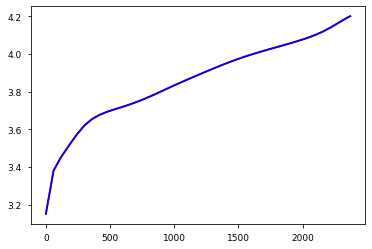

In [4]:
sol = sim.solution
fig, ax = plt.subplots()
for cycle in sol.cycles:
    t = cycle.steps[2]["Time [s]"].data
    V = cycle.steps[2]["Terminal voltage [V]"].data
    ax.plot(t-t[0],V)

## GITT

In [5]:
experiment = pybamm.Experiment([
    "Discharge at C/20 for 1 hour",
    "Rest for 1 hour",
] * 20)
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

2021-09-24 15:20:57,328 - [NOTICE] simulation.solve(784): Cycle 1/40 (24.214 ms elapsed) --------------------
2021-09-24 15:20:57,328 - [NOTICE] simulation.solve(818): Cycle 1/40, step 1/1: Discharge at C/20 for 1 hour
2021-09-24 15:20:57,502 - [NOTICE] simulation.solve(784): Cycle 2/40 (198.838 ms elapsed) --------------------
2021-09-24 15:20:57,503 - [NOTICE] simulation.solve(818): Cycle 2/40, step 1/1: Rest for 1 hour
2021-09-24 15:20:57,582 - [NOTICE] simulation.solve(784): Cycle 3/40 (278.563 ms elapsed) --------------------
2021-09-24 15:20:57,583 - [NOTICE] simulation.solve(818): Cycle 3/40, step 1/1: Discharge at C/20 for 1 hour
2021-09-24 15:20:57,640 - [NOTICE] simulation.solve(784): Cycle 4/40 (336.355 ms elapsed) --------------------
2021-09-24 15:20:57,640 - [NOTICE] simulation.solve(818): Cycle 4/40, step 1/1: Rest for 1 hour
2021-09-24 15:20:57,689 - [NOTICE] simulation.solve(784): Cycle 5/40 (385.740 ms elapsed) --------------------
2021-09-24 15:20:57,690 - [NOTICE] s

2021-09-24 15:20:59,466 - [NOTICE] simulation.solve(818): Cycle 39/40, step 1/1: Discharge at C/20 for 1 hour
2021-09-24 15:20:59,521 - [NOTICE] simulation.solve(784): Cycle 40/40 (2.218 s elapsed) --------------------
2021-09-24 15:20:59,521 - [NOTICE] simulation.solve(818): Cycle 40/40, step 1/1: Rest for 1 hour
2021-09-24 15:20:59,571 - [NOTICE] simulation.solve(913): Finish experiment simulation, took 2.267 s


interactive(children=(FloatSlider(value=0.0, description='t', max=40.000000000000014, step=0.40000000000000013…

OCV measurements

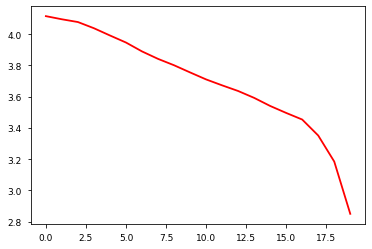

In [6]:
sol = sim.solution

def extract_ocv(step):
    return step["Terminal voltage [V]"].data[-1]

ocvs = [extract_ocv(step) for i,step in enumerate(sol.cycles) if i%2==1]
plt.plot(np.arange(20),ocvs)

Resistance measurements

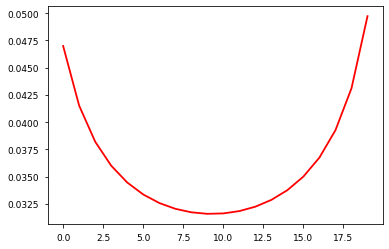

In [7]:
def extract_resistance(step):
    return step["Local ECM resistance [Ohm]"].data[0]

Rs = [extract_resistance(step) for i,step in enumerate(sol.cycles) if i%2==0]
plt.plot(np.arange(20),Rs)

## Initial SOC

In [8]:
experiment = pybamm.Experiment([("Charge at 1C until 4.2V", "Hold at 4.2V until C/50")])
sols = []
init_socs = [0,0.2,0.4,0.6,0.8]
for initial_soc in init_socs:
  sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
  sol = sim.solve(initial_soc=initial_soc)
  sols.append(sol)

pybamm.dynamic_plot(sols,labels=[f"initial soc = {x}" for x in init_socs])

2021-09-24 15:21:01,518 - [NOTICE] simulation.solve(784): Cycle 1/1 (25.194 ms elapsed) --------------------
2021-09-24 15:21:01,519 - [NOTICE] simulation.solve(818): Cycle 1/1, step 1/2: Charge at 1C until 4.2V
2021-09-24 15:21:01,597 - [NOTICE] simulation.solve(818): Cycle 1/1, step 2/2: Hold at 4.2V until C/50
2021-09-24 15:21:02,034 - [NOTICE] simulation.solve(913): Finish experiment simulation, took 541.060 ms
2021-09-24 15:21:03,182 - [NOTICE] simulation.solve(784): Cycle 1/1 (25.420 ms elapsed) --------------------
2021-09-24 15:21:03,182 - [NOTICE] simulation.solve(818): Cycle 1/1, step 1/2: Charge at 1C until 4.2V
2021-09-24 15:21:03,249 - [NOTICE] simulation.solve(818): Cycle 1/1, step 2/2: Hold at 4.2V until C/50
2021-09-24 15:21:03,685 - [NOTICE] simulation.solve(913): Finish experiment simulation, took 528.425 ms
2021-09-24 15:21:04,772 - [NOTICE] simulation.solve(784): Cycle 1/1 (23.790 ms elapsed) --------------------
2021-09-24 15:21:04,772 - [NOTICE] simulation.solve(8

interactive(children=(FloatSlider(value=0.0, description='t', max=1.95719491538188, step=0.0195719491538188), …

Looking at each CV relaxation

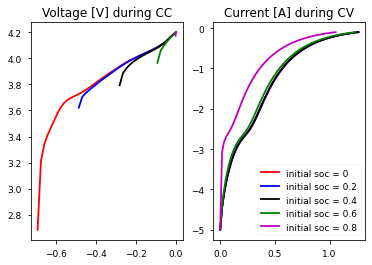

In [9]:
fig, ax = plt.subplots(1,2)

for sol in sols:
  cc = sol.cycles[0].steps[0]
  cv = sol.cycles[0].steps[1]
  t_cc = cc["Time [h]"].data
  t_cv = cv["Time [h]"].data
  ax[0].plot(t_cc-t_cv[0], cc["Terminal voltage [V]"].data)
  ax[0].set_title("Voltage [V] during CC")
  ax[1].plot(t_cv-t_cv[0], cv["Current [A]"].data)
  ax[1].set_title("Current [A] during CV")
  ax[1].legend([f"initial soc = {x}" for x in init_socs])